# Presentation figures <a class='tocSkip'></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dry-regime" data-toc-modified-id="Dry-regime-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dry regime</a></span><ul class="toc-item"><li><span><a href="#Neutral-buoyancy-level" data-toc-modified-id="Neutral-buoyancy-level-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Neutral buoyancy level</a></span></li></ul></li><li><span><a href="#Saturated-regime" data-toc-modified-id="Saturated-regime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Saturated regime</a></span><ul class="toc-item"><li><span><a href="#Neutral-buoyancy-level" data-toc-modified-id="Neutral-buoyancy-level-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Neutral buoyancy level</a></span></li></ul></li><li><span><a href="#Ground-impact-velocity" data-toc-modified-id="Ground-impact-velocity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ground impact velocity</a></span></li><li><span><a href="#Minimum-height" data-toc-modified-id="Minimum-height-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Minimum height</a></span></li></ul></div>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from metpy.units import units
from pint import set_application_registry

from os import mkdir
from os.path import exists
import sys
import shelve

sys.path.append('../../scripts/')
from environment import Environment

In [15]:
set_application_registry(units)
fig_path = ('/Users/tschanzer/OneDrive - UNSW/UNSW2021/T3/ToR/20210930_presentation/figures/')
if not exists(fig_path):
    mkdir(fig_path)

## Dry regime

In [26]:
data_filename = (
    '../20210922_sounding_comparisons/20210922_sounding_comparisons_data')
comparison_filename = '../20210928_motion_with_initial_velocity/20210928_motion_with_initial_velocity_data'

In [5]:
# retrieve sounding objects from file
with shelve.open(data_filename) as file:
    sydney = file['Sydney']
    singapore = file['Singapore']
    abu_dhabi = file['Abu Dhabi']
    mawson = file['Mawson']

### Neutral buoyancy level

In [9]:
# retrieve from file
with shelve.open(data_filename) as file:
    max_dq_height = file['max_dq']['height']
    max_dq = file['max_dq']['max_dq']
    height = file['dry_buoyancy_level']['height']
    dq = file['dry_buoyancy_level']['dq']
    dry_buoyancy_level = file['dry_buoyancy_level']['dry_buoyancy_level']

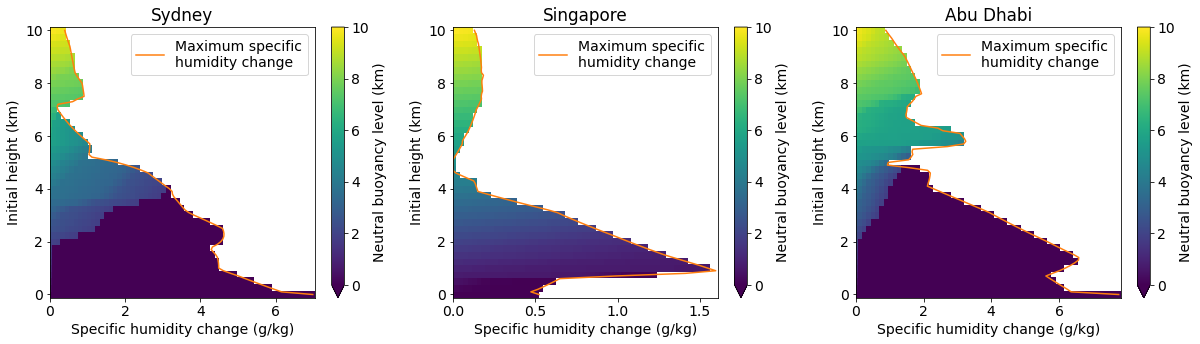

In [23]:
fig = plt.figure(figsize=(17,5))
plt.rcParams.update({'font.size': 14})

for i, sounding in enumerate([sydney, singapore, abu_dhabi]):
    ax = fig.add_subplot(131+i)
    mesh = ax.pcolormesh(
        dq[sounding.name]*1e3, height, dry_buoyancy_level[sounding.name],
        shading='nearest')
    cbar = plt.colorbar(mesh, extend='min')
    cbar.set_label('Neutral buoyancy level (km)')

    ax.plot(
        max_dq[sounding.name]*1e3, max_dq_height,
        label='Maximum specific\nhumidity change', color='tab:orange')
    ax.legend()

    ax.set(
        xlabel='Specific humidity change (g/kg)',
        ylabel='Initial height (km)',
        title=sounding.name)
    ax.set_xlim(left=0)

fig.tight_layout()
fig.savefig(
    fig_path + 'dry_neutral_buoyancy_level.png', facecolor='w', dpi=300,
    bbox_inches='tight')
plt.show()

## Saturated regime
### Neutral buoyancy level

In [24]:
# retrieve from file
with shelve.open(data_filename) as file:
    height = file['corrected_limited_buoyancy_level']['height']
    liquid_ratio = file['corrected_limited_buoyancy_level']['liquid_ratio']
    limited_buoyancy_level = \
        file['corrected_limited_buoyancy_level']['limited_buoyancy_level']

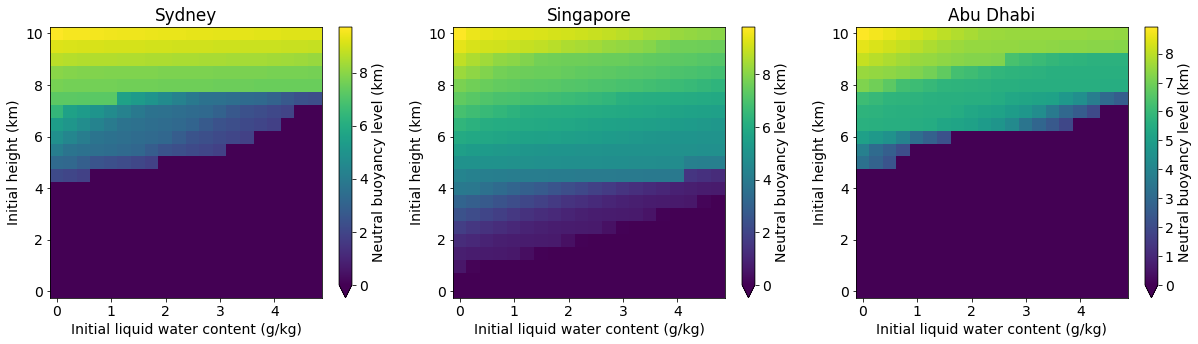

In [25]:
fig = plt.figure(figsize=(17,5))
plt.rcParams.update({'font.size': 14})

for i, sounding in enumerate([sydney, singapore, abu_dhabi]):
    ax = fig.add_subplot(131+i)
    mesh = ax.pcolormesh(
        liquid_ratio*1e3, height, limited_buoyancy_level[sounding.name],
        shading='nearest')
    cbar = plt.colorbar(mesh, extend='min')
    cbar.set_label('Neutral buoyancy level (km)')

    ax.set(
        xlabel='Initial liquid water content (g/kg)',
        ylabel='Initial height (km)',
        title=sounding.name)

fig.tight_layout()
fig.savefig(
    fig_path + 'limited_neutral_buoyancy_level.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()

## Ground impact velocity

In [35]:
# retrieve from file
with shelve.open(comparison_filename) as file:
    dq_dry = file['dry_motion_3km_down']['dq']
    time_dry = file['dry_motion_3km_down']['time']
    initial_velocity_up_dry = file['dry_motion_3km_up']['motion']
    initial_velocity_down_dry = file['dry_motion_3km_down']['motion']
with shelve.open(data_filename) as file:
    initial_velocity_zero_dry = file['dry_motion_3km']['dry_motion_3km']

In [37]:
# retrieve from file
with shelve.open(comparison_filename) as file:
    initial_height_sat = file['saturated_motion_up']['initial_height']
    time_sat = file['saturated_motion_up']['time']
    initial_velocity_up_sat = file['saturated_motion_up']['motion']
    initial_velocity_down_sat = file['saturated_motion_down']['motion']
with shelve.open(data_filename) as file:
    initial_velocity_zero_sat = file['saturated_motion']['saturated_motion']
    zero_time_sat = file['saturated_motion']['time']

In [38]:
# retrieve from file
with shelve.open(comparison_filename) as file:
    liquid_ratio_lim = file['limited_motion_3km_up']['liquid_ratio']
    time_lim = file['limited_motion_3km_up']['time']
    initial_velocity_up_lim = file['limited_motion_3km_up']['motion']
    initial_velocity_down_lim = file['limited_motion_3km_down']['motion']
with shelve.open(data_filename) as file:
    initial_velocity_zero_lim = \
        file['limited_motion_3km_corrected']['limited_motion_3km']
    time_zero_lim = file['limited_motion_3km_corrected']['time']
    liquid_ratio_zero_lim = file['limited_motion_3km_corrected']['liquid_ratio']

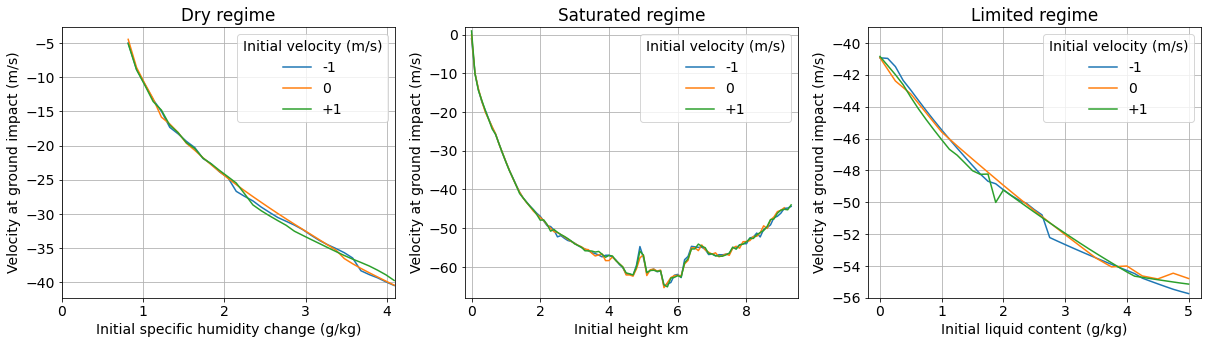

In [47]:
fig = plt.figure(figsize=(17,5))
plt.rcParams.update({'font.size': 14})

ax = fig.add_subplot(131)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_down_dry[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_zero_dry[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_up_dry[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title='Dry regime')
    ax.grid()
    
ax = fig.add_subplot(132)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        initial_height_sat,
        initial_velocity_down_sat[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        initial_height_sat,
        initial_velocity_zero_sat[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        initial_height_sat,
        initial_velocity_up_sat[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set(
        xlabel='Initial height km',
        ylabel='Velocity at ground impact (m/s)',
        title='Saturated regime')
    ax.set_xlim(-0.2, 9.5)
    ax.set_ylim(-68, 2)
    ax.grid()
    
ax = fig.add_subplot(133)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        liquid_ratio_lim*1e3,
        initial_velocity_down_lim[sounding.name].hit_ground_velocity,
        label='-1')
    ax.plot(
        liquid_ratio_zero_lim*1e3,
        initial_velocity_zero_lim[sounding.name].hit_ground_velocity,
        label='0')
    ax.plot(
        liquid_ratio_lim*1e3,
        initial_velocity_up_lim[sounding.name].hit_ground_velocity,
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set_ylim(-56, -39)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Velocity at ground impact (m/s)',
        title='Limited regime')
    ax.grid()
    
fig.tight_layout()
fig.savefig(
    fig_path + 'abu_dhabi_impact_velocity.png', dpi=300, facecolor='w',
    bbox_inches='tight')
plt.show()

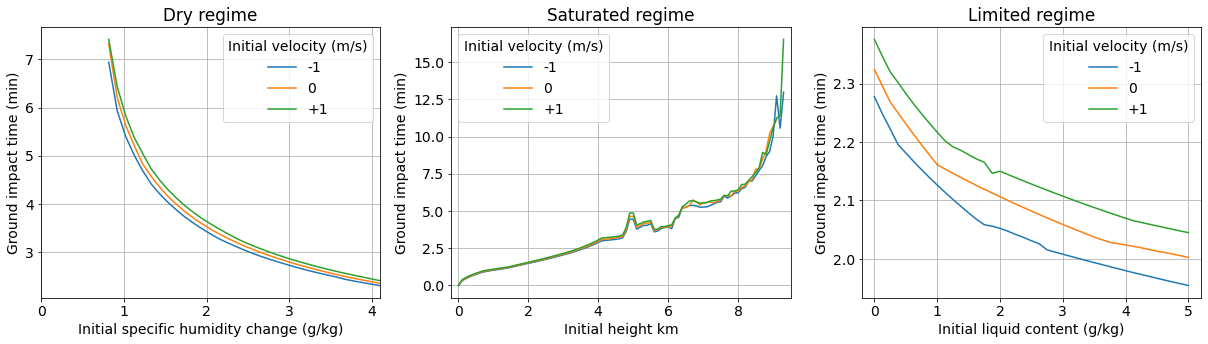

In [48]:
fig = plt.figure(figsize=(17,5))
plt.rcParams.update({'font.size': 14})

ax = fig.add_subplot(131)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_down_dry[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_zero_dry[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        dq_dry[sounding.name]*1e3,
        initial_velocity_up_dry[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(0, 4.1)
    ax.set(
        xlabel='Initial specific humidity change (g/kg)',
        ylabel='Ground impact time (min)',
        title='Dry regime')
    ax.grid()
    
ax = fig.add_subplot(132)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        initial_height_sat,
        initial_velocity_down_sat[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        initial_height_sat,
        initial_velocity_zero_sat[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        initial_height_sat,
        initial_velocity_up_sat[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set(
        xlabel='Initial height km',
        ylabel='Ground impact time (min)',
        title='Saturated regime')
    ax.set_xlim(-0.2, 9.5)
    ax.grid()
    
ax = fig.add_subplot(133)
for i, sounding in enumerate([abu_dhabi]):
    ax.plot(
        liquid_ratio_lim*1e3,
        initial_velocity_down_lim[sounding.name].hit_ground_time.to(units.min),
        label='-1')
    ax.plot(
        liquid_ratio_zero_lim*1e3,
        initial_velocity_zero_lim[sounding.name].hit_ground_time.to(units.min),
        label='0')
    ax.plot(
        liquid_ratio_lim*1e3,
        initial_velocity_up_lim[sounding.name].hit_ground_time.to(units.min),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set_xlim(-0.2, 5.2)
    ax.set(
        xlabel='Initial liquid content (g/kg)',
        ylabel='Ground impact time (min)',
        title='Limited regime')
    ax.grid()
    
fig.tight_layout()
fig.savefig(
    fig_path + 'abu_dhabi_impact_time.png', dpi=300, facecolor='w',
    bbox_inches='tight')
plt.show()

## Minimum height

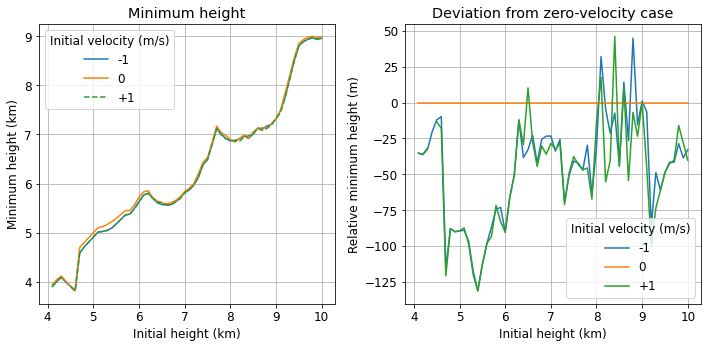

In [60]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})

ax = fig.add_subplot(121)
for i, sounding in enumerate([singapore]):
    ax.plot(
        initial_height_sat,
        initial_velocity_down_sat[sounding.name].min_height.to(units.km),
        label='-1')
    ax.plot(
        initial_height_sat,
        initial_velocity_zero_sat[sounding.name].min_height.to(units.km),
        label='0')
    ax.plot(
        initial_height_sat,
        initial_velocity_up_sat[sounding.name].min_height.to(units.km), '--',
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Minimum height (km)',
        title='Minimum height')
    ax.grid()
    
ax = fig.add_subplot(122)
for i, sounding in enumerate([singapore]):
    ax.plot(
        initial_height_sat,
        (initial_velocity_down_sat[sounding.name].min_height.to(units.m)
         - initial_velocity_zero_sat[sounding.name].min_height.to(units.m)),
        label='-1')
    ax.plot(
        initial_height_sat,
        (initial_velocity_zero_sat[sounding.name].min_height.to(units.m)
         - initial_velocity_zero_sat[sounding.name].min_height.to(units.m)),
        label='0')
    ax.plot(
        initial_height_sat,
        (initial_velocity_up_sat[sounding.name].min_height.to(units.m)
         - initial_velocity_zero_sat[sounding.name].min_height.to(units.m)),
        label='+1')
    lgd = ax.legend()
    lgd.set_title('Initial velocity (m/s)')
    ax.set(
        xlabel='Initial height (km)',
        ylabel='Relative minimum height (m)',
        title='Deviation from zero-velocity case')
    ax.grid()
    
fig.tight_layout()
fig.savefig(
    fig_path + 'singapore_saturated_min_height.png',
    dpi=300, facecolor='w', bbox_inches='tight')
plt.show()